# Visualizations

## Packages and Presets

In [8]:
import pandas as pd
import plotnine as pn
from mizani.formatters import percent_format
import numpy as np

from IPython.display import display

In [9]:
# see: https://nanx.me/ggsci/reference/pal_jama.html
jama_colors = [
    "#374E55FF",
    "#eigenval_eigenval_df8F44FF",
    "#00A1D5FF",
    "#B24745FF",
    "#79AF97FF",
    "#6A6599FF",
    "#80796BFF",
]

# see: https://nanx.me/ggsci/reference/pal_aaas.html
aaas_colors = [
    "#3B4992FF",
    "#EE0000FF",
    "#008B45FF",
    "#631879FF",
    "#008280FF",
    "#008280FF",
    "#BB0021FF",
    "#5F559BFF",
    "#A20056FF",
    "#808180FF",
    "#1B1919FF",
]


theme_academic = pn.theme(
    text=pn.element_text(family="monospace"),
    plot_title=pn.element_text(weight="bold", size=14, ha="center"),
    legend_text=pn.element_text(size=8),  # Smaller font for legend items
    legend_title=pn.element_text(size=9),  # Reduce font size for legend title
    panel_background=pn.element_rect(fill="white"),  # Clean white background
    panel_border=pn.element_rect(color="grey", size=0.5),
    axis_ticks=pn.element_line(color="grey"),
    panel_grid_major=pn.element_line(color="grey", size=0.1, alpha=0.3),
    panel_grid_minor=pn.element_line(color="grey", size=0.1, alpha=0.3),
    legend_background=pn.element_rect(fill="white", color=None),
    legend_key=pn.element_rect(fill="white", color=None),
    legend_position="right",
    legend_key_size=8,
    plot_margin=0.02,
    figure_size=(8, 4),  # Set default figure size (width, height in inches)
)

## Subspace Overlaps

/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


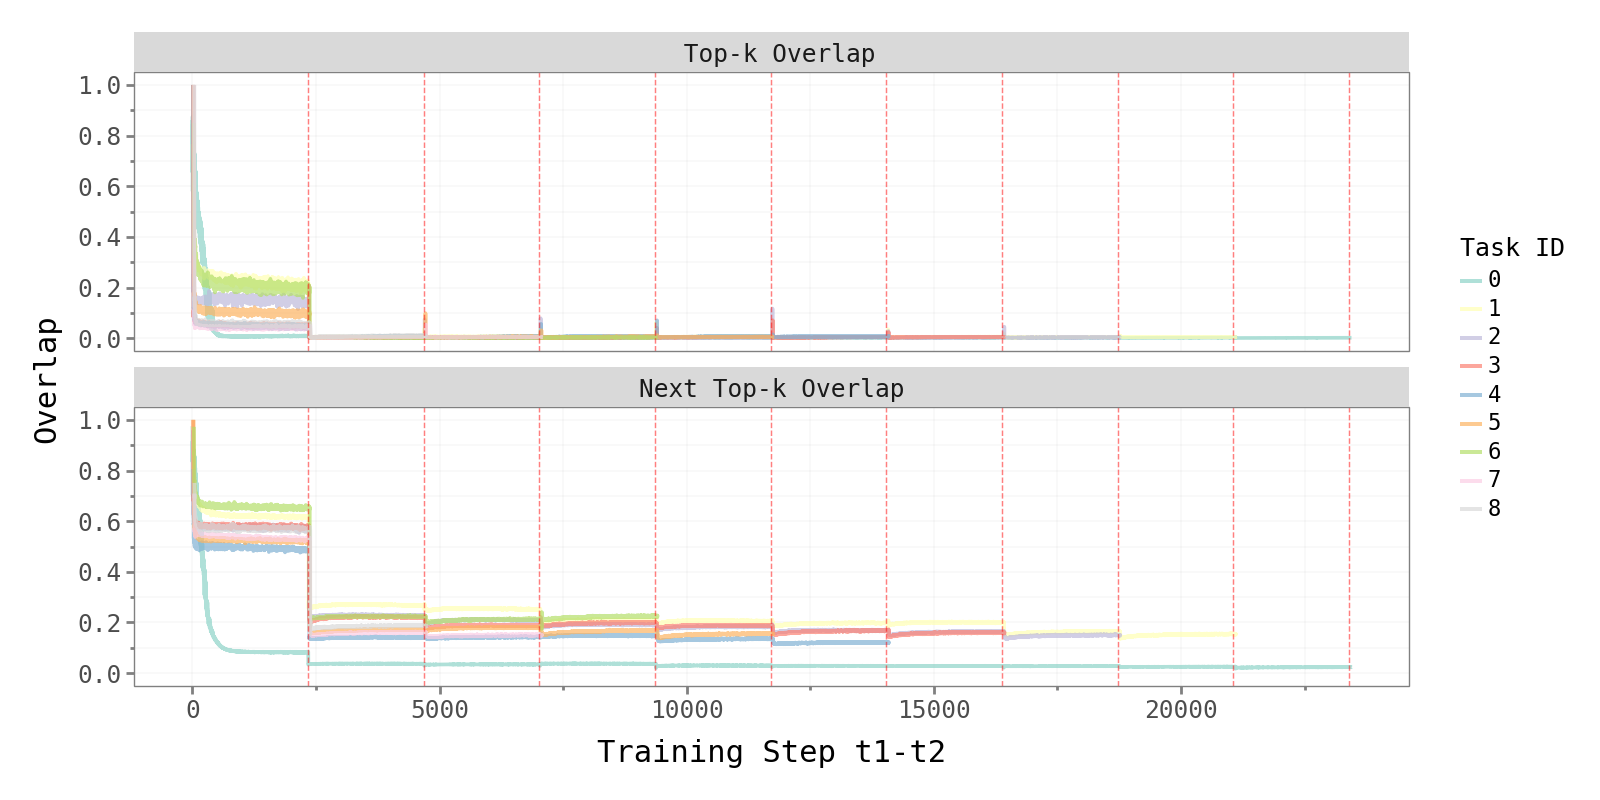

/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: overlaps_perm_mnist.pdf
/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


In [ ]:
overlap_df = pd.read_csv(
    "../results/permuted_mnist/subspace-None/k-10/batch_size-128/hidden_dim-100/lr-0.01/seed-42/metrics/overlaps.csv"
)

steps_per_epoch = 60000 // 128  # nr of batches in dataloader
task_boundaries = np.arange(
    steps_per_epoch * 5, overlap_df["step"].max(), steps_per_epoch * 5
)  # Get every 5th boundary


# reshape  data from wide to long format for faceting
overlap_df_long = pd.melt(
    overlap_df,
    id_vars=["task_id", "step"],
    value_vars=["overlap", "overlap_next_top_k"],
    var_name="metric",
    value_name="value",
)

# Create more descriptive labels for the overlap metrics
overlap_df_long["metric"] = overlap_df_long["metric"].map(
    {"overlap": " Top-k Overlap", "overlap_next_top_k": "Next Top-k Overlap"}
)


fig_overlaps_perm_mnist = (
    pn.ggplot(
        overlap_df_long,
        pn.aes(x="step", y="value", color="factor(task_id)", group="task_id"),
    )
    + pn.geom_line(alpha=0.7, size=0.75)
    + pn.scale_color_brewer(name="Task ID", type="qual", palette="Set3")
    + pn.geom_vline(
        xintercept=task_boundaries, color="red", linetype="dashed", size=0.3, alpha=0.5
    )
    + pn.facet_wrap("~ metric", ncol=1)
    + pn.scale_y_continuous(
        # labels=percent_format(),
        limits=[0, 1],
        breaks=np.arange(0, 1.1, 0.2),
    )
    + theme_academic
    + pn.labs(
        x="Training Step t1-t2",
        y="Overlap",
        # title="Evolution of Top-k Overlaps During Training",
        # caption="Note: Lines represent different training tasks"
    )
)

display(fig_overlaps_perm_mnist)

fig_overlaps_perm_mnist.save("overlaps_perm_mnist.pdf", dpi=300, width=8, height=4)

In [16]:
task_boundaries

array([ 2345,  4690,  7035,  9380, 11725, 14070, 16415, 18760, 21105])

In [19]:
eigenval_df.shape[0] / 20

23450.0

/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/mizani/palettes.py:497: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors


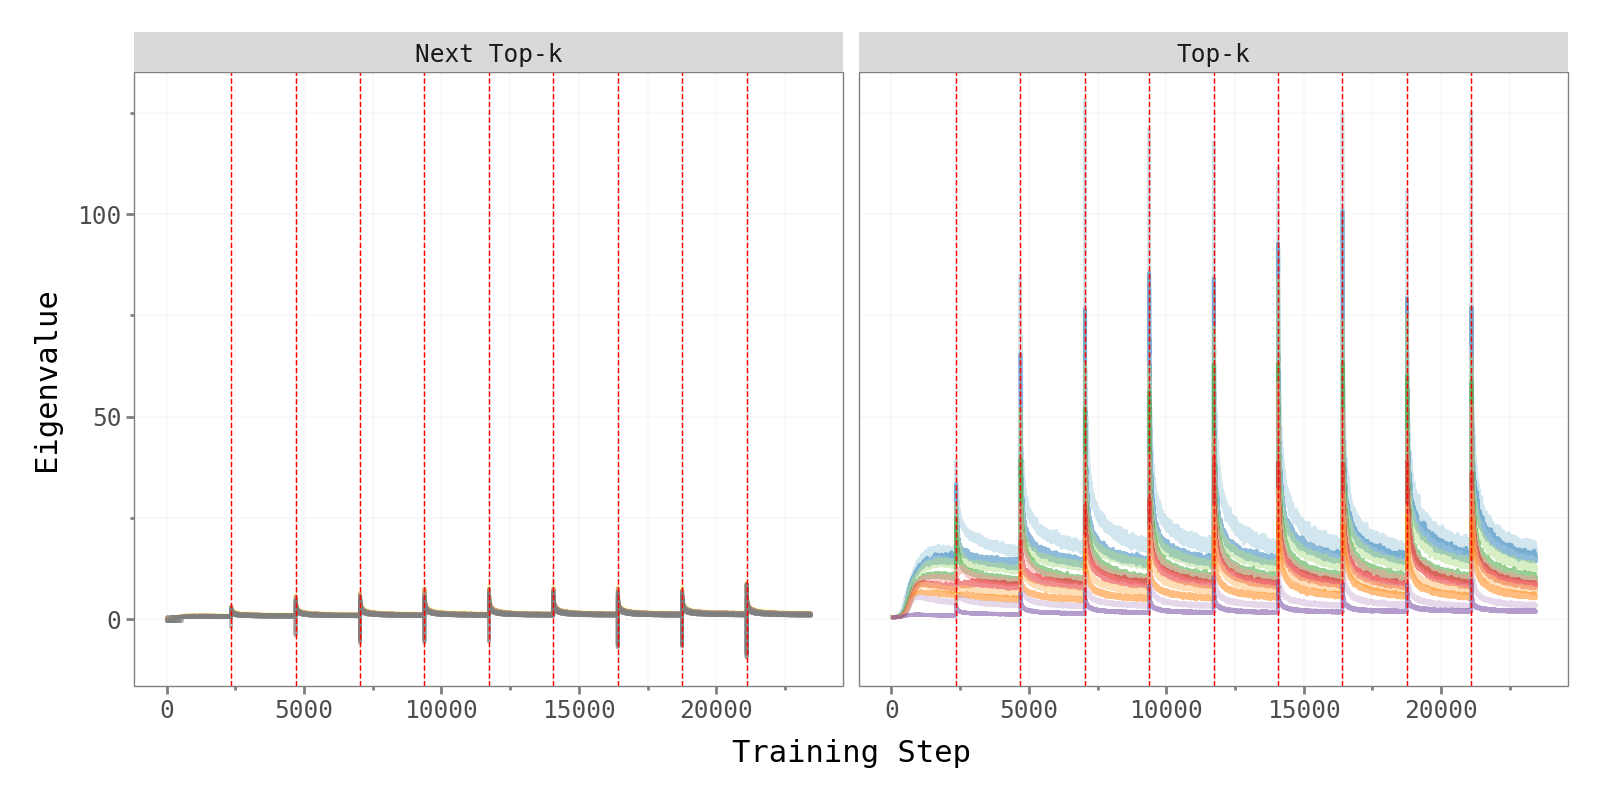

/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 4 in image.
/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: eigenvalues_perm_mnist.png
/home/janhsc/miniconda3/envs/cf/lib/python3.10/site-packages/mizani/palettes.py:497: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors


In [25]:
eigenval_df = pd.read_csv(
    "../results/permuted_mnist/subspace-None/k-10/batch_size-128/hidden_dim-100/lr-0.01/seed-42/metrics/eigenvalues.csv"
)


# sanity filter for evals between 1 and 20
eigenval_df_filtered = eigenval_df[eigenval_df["eigenvalue_nr"].between(1, 20)].copy()

# distinguish between top 10 and next 10 eigenvalues
eigenval_df_filtered["group"] = "Top-k"  # Default value
eigenval_df_filtered.loc[eigenval_df_filtered["eigenvalue_nr"] > 10, "group"] = (
    "Next Top-k"
)

# calculate step nr
steps_per_epoch = eigenval_df["batch_id"].max() + 1
steps_per_task = steps_per_epoch * 5
eigenval_df_filtered["step"] = (
    # sum of previous tasks:
    eigenval_df_filtered["task_id"] * steps_per_task
    # add steps within task of previous epochs
    + steps_per_epoch * eigenval_df_filtered["epoch"]
    # add steps within epoch
    + eigenval_df_filtered["batch_id"]
    + 1
)

# calc. task boundaries
task_boundaries = np.arange(steps_per_task, 10 * steps_per_task, steps_per_task)

fig_eigenvals_perm_mnist = (
    pn.ggplot(
        eigenval_df_filtered,
        pn.aes(
            x="step",
            y="value",
            color="factor(eigenvalue_nr)",
            group="eigenvalue_nr",
        ),
    )
    + pn.geom_line(size=0.75, alpha=0.5)
    + pn.scale_color_brewer(type="qual", palette="Paired")
    + pn.geom_vline(
        xintercept=task_boundaries, color="red", linetype="dashed", size=0.3
    )
    + pn.facet_wrap("~ group")
    + theme_academic
    + pn.theme(legend_position="none")
    + pn.labs(
        x="Training Step",
        y="Eigenvalue",
        # title="Evolution of Individual Eigenvalues During Training",
    )
)

display(fig_eigenvals_perm_mnist)

fig_eigenvals_perm_mnist.save(
    "eigenvalues_perm_mnist.png", dpi=300, bbox_inches="tight", height=4, width=8
)